Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


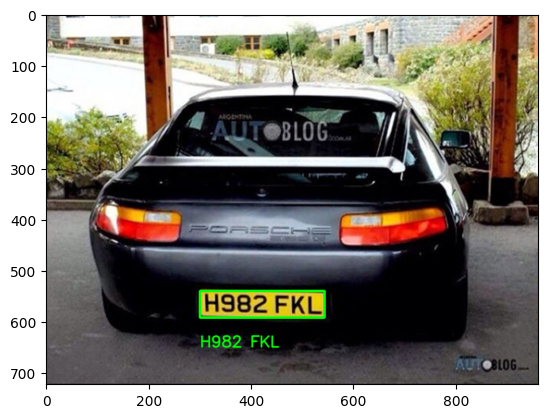

Detected image saved at images/detected_image.jpg


In [3]:
# INSTALL AND IMPORT DEPENDENCIES
# Uncomment these lines if running in Jupyter Notebook
# !pip install easyocr
# !pip install imutils

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# READ IN IMAGE, GRAYSCALE AND BLUR
img = cv2.imread('images/image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# APPLY FILTER AND FIND EDGES FOR LOCALIZATION
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
edged = cv2.Canny(bfilter, 30, 200)  # Edge detection

# FIND CONTOURS AND APPLY MASK
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

# Use EASY OCR TO READ TEXT
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

# RENDER RESULTS
if result:
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Save the detected image
output_path = 'images/detected_image.jpg'
cv2.imwrite(output_path, res)

# Display the results in Jupyter Notebook
if 'get_ipython' in globals():
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    cv2.imshow('Detected Image', res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(f"Detected image saved at {output_path}")

In [ ]:
# INSTALL AND IMPORT DEPENDENCIES
# Uncomment these lines if running in Jupyter Notebook
# !pip install easyocr
# !pip install imutils

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

def process_frame(frame):
    # GRAYSCALE AND BLUR
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # APPLY FILTER AND FIND EDGES FOR LOCALIZATION
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
    edged = cv2.Canny(bfilter, 30, 200)  # Edge detection

    # FIND CONTOURS AND APPLY MASK
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    if location is None:
        return frame

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(frame, frame, mask=mask)

    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

    # Use EASY OCR TO READ TEXT
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

    # RENDER RESULTS
    if result:
        text = result[0][-2]
        font = cv2.FONT_HERSHEY_SIMPLEX
        frame = cv2.putText(frame, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
        frame = cv2.rectangle(frame, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

    return frame

# Process video
video_path = 'videos/tc.mp4'  # Change to your video path
output_video_path = 'videos/detected_video.mp4'
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    processed_frame = process_frame(frame)
    out.write(processed_frame)

    # Display the frame in Jupyter Notebook
    if 'get_ipython' in globals():
        plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        cv2.imshow('Frame', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Detected video saved at {output_video_path}")

In [ ]:
# INSTALL AND IMPORT DEPENDENCIES
# Uncomment these lines if running in Jupyter Notebook
# !pip install easyocr
# !pip install imutils

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

def process_frame(frame):
    # GRAYSCALE AND BLUR
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # APPLY FILTER AND FIND EDGES FOR LOCALIZATION
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
    edged = cv2.Canny(bfilter, 30, 200)  # Edge detection

    # FIND CONTOURS AND APPLY MASK
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    reader = easyocr.Reader(['en'])
    
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            mask = np.zeros(gray.shape, np.uint8)
            new_image = cv2.drawContours(mask, [approx], 0, 255, -1)
            new_image = cv2.bitwise_and(frame, frame, mask=mask)

            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

            # Use EASY OCR TO READ TEXT
            result = reader.readtext(cropped_image)

            # RENDER RESULTS
            if result:
                text = result[0][-2]
                font = cv2.FONT_HERSHEY_SIMPLEX
                frame = cv2.putText(frame, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                frame = cv2.rectangle(frame, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

    return frame

# Process video
video_path = 'videos/tc.mp4'  # Change to your video path
output_video_path = 'videos/detected_video2.mp4'
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    processed_frame = process_frame(frame)
    out.write(processed_frame)

    # Display the frame in Jupyter Notebook
    if 'get_ipython' in globals():
        plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        cv2.imshow('Frame', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Detected video saved at {output_video_path}")